<h1 style="color:blue;">Technocolabs - Machine Learning Internship</h1>
<h2 style="color:green;3"> Submitted by Umme Athiya</h2>
<h3>Task 2 - Exploring_Remaining_Financial_Features_in_the_Dataset </h3>
<h3 style="color:Maroon";>Importing the required libraries</h3>

In [1]:
import pandas as pd
import numpy as np

<h3 style="color:Maroon";>Reading the dataset</h3>

In [2]:
df = pd.read_excel('default_of_credit_card_clients.xls')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


<h2 style="color:Green";>Verify Basic Integrity</h2>
we will perform a basic check on whether our dataset contains what we expect and verify whether there are the correct number of samples.
The data are supposed to have observations for 30,000 credit accounts. While there are 30,000 rows, we should also check whether there are 30,000 unique account IDs. It's possible that, if the SQL query used to generate the data was run on an unfamiliar schema, values that are supposed to be unique are in fact not unique.
To examine this, we can check if the number of unique account IDs is the same as the number of rows. Perform the following steps to complete the activity:

In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
df.shape

(30000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

The ID column seems like it contains unique identifiers. Now, to verify if they are in fact unique throughout the whole dataset, we can count the number of unique values using the .nunique() method on the Series (aka column) ID. We first select the column using square brackets.

In [6]:
df['ID'].nunique()

29687

In [7]:
id_counts = df['ID'].value_counts()
id_counts.head()

e850d228-6879    2
4f249cbc-5e9c    2
1bf3b4eb-d759    2
89f8f447-fca8    2
415c344e-309f    2
Name: ID, dtype: int64

In [8]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

<h2 style="color:green;">Boolean Masks</h2>
To help clean the case study data, we introduce the concept of a logical mask, also known as a Boolean mask. A logical mask is a way to filter an array, or series, by some condition. For example, we can use the "is equal to" operator in Python, ==, to find all locations of an array that contain a certain value. Other comparisons, such as "greater than" (>), "less than" (<), "greater than or equal to" (>=), and "less than or equal to" (<=), can be used similarly. The output of such a comparison is an array or series of True/False values, also known as Boolean values. Each element of the output corresponds to an element of the input, is True if the condition is met, and is False otherwise. To illustrate how this works, we will use synthetic data. Synthetic data is data that is created to explore or illustrate a concept. First, we are going to import the NumPy package, which has many capabilities for generating random numbers, and give it the alias np

Now we use what's called a seed for the random number generator. If you set the seed, you will get the same results from the random number generator across runs. Otherwise this is not guaranteed. This can be a helpful option if you use random numbers in some way in your work and want to have consistent results every time you run a notebook:

In [10]:
np.random.seed(seed=24)

Next, we generate 100 random integers, chosen from between 1 and 5 (inclusive). For this we can use numpy.random.randint, with the appropriate arguments.

In [11]:
random_integers = np.random.randint(low=1,high=5,size=100)

Suppose we wanted to know the locations of all elements of random_integers equal to 3. We could create a Boolean mask to do this.

In [12]:
is_equal_to_3 = random_integers == 3

From examining the first 5 elements, we know the first element is equal to 3, but none of the rest are. So in our Boolean mask, we expect True in the first position and False in the next 4 positions. Is this the case?

In [70]:
is_equal_to_3[:5]

array([ True, False, False, False, False])

This is what we expected. This shows the creation of a Boolean mask. But what else can we do with them? Suppose we wanted to know how many elements were equal to 3. To know this, you can take the sum of a Boolean mask, which interprets True as 1 and False as 0:

In [14]:
sum(is_equal_to_3)

22

This makes sense, as with a random, equally likely choice of 5 possible values, we would expect each value to appear about 20% of the time. In addition to seeing how many values in the array meet the Boolean condition, we can also use the Boolean mask to select the elements of the original array that meet that condition. Boolean masks can be used directly to index arrays, as shown here:

In [15]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

<h2 style="color:green;">Continuing Verification of Data Integrity</h2>

with our knowledge of Boolean arrays, we will examine some of the duplicate IDs we discovered. In a previous step, we learned that no ID appears more than twice. We can use this learning to locate the duplicate IDs and examine them. Then we take action to remove rows of dubious quality from the dataset. Perform the following steps to complete the activity:
Continuing where we left off earlier, we want the indices of the id_counts series, where the count is 2, to locate the duplicates. We assign the indices of the duplicated IDs to a variable called dupe_mask and display the first 5 duplicated IDs using the following commands:

In [16]:
dupe_mask = id_counts == 2
dupe_mask[0:5]

e850d228-6879    True
4f249cbc-5e9c    True
1bf3b4eb-d759    True
89f8f447-fca8    True
415c344e-309f    True
Name: ID, dtype: bool

In [17]:
id_counts.index[0:5]

Index(['e850d228-6879', '4f249cbc-5e9c', '1bf3b4eb-d759', '89f8f447-fca8',
       '415c344e-309f'],
      dtype='object')

In [18]:
dupe_ids = id_counts.index[dupe_mask]

We changed the dupe_ids variable to a list, as we will need it in this form for future steps. The list has a length of 313, as can be seen in the preceding output, which matches our knowledge of the number of duplicate IDs from the value count.

In [19]:
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

We verify the data in dupe_ids by displaying the first five entries using the following command:

In [20]:
dupe_ids[0:5]

['e850d228-6879',
 '4f249cbc-5e9c',
 '1bf3b4eb-d759',
 '89f8f447-fca8',
 '415c344e-309f']

We can observe from the preceding output that the list contains the required entries of duplicate IDs. We're now in a position to examine the data for the IDs in our list of duplicates. In particular, we'd like to look at the values of the features, to see what, if anything, might be different between these duplicate entries. We will use the .isin and .loc methods for this purpose.
Using the first three IDs on our list of dupes, dupe_ids[0:3], we will plan to first find the rows containing these IDs. If we pass this list of IDs to the .isin method of the ID series, this will create another logical mask we can use on the larger DataFrame to display the rows that have these IDs. The .isin method is nested in a .loc statement indexing the DataFrame in order to select the location of all rows containing True in the Boolean mask. The second argument of the .loc indexing statement is :, which implies that all columns will be selected. By performing the following steps, we are essentially filtering the DataFrame in order to view all the columns for the first three duplicate IDs.
Run the following command in your Notebook to execute the plan we formulated in the previous step:

In [21]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10) 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1959,1bf3b4eb-d759,70000,2,3,1,57,0,0,0,0,...,49103,45830,46769,2620,2730,1936,1700,1700,2000,0
2059,1bf3b4eb-d759,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15936,e850d228-6879,130000,2,2,2,42,Not available,0,0,-1,...,21000,858,2160,5026,5000,21000,858,2160,200,0
16036,e850d228-6879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18824,4f249cbc-5e9c,90000,2,1,2,27,0,0,0,0,...,60210,61221,62636,3200,3500,3000,2600,2600,3000,0
18924,4f249cbc-5e9c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_zero_mask = df == 0

In [23]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [24]:
sum(feature_zero_mask)

315

In [25]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [26]:
df_clean_1.shape

(29685, 25)

In [27]:
df_clean_1['ID'].nunique()

29685

<h2 style="color:green;">Exploring and Cleaning the Data</h2>

In [28]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [29]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [30]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [31]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [32]:
sum(valid_pay_1_mask)

26664

In [33]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [34]:
df_clean_2.shape

(26664, 25)

In [35]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [36]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


<h2 style="color:green;">Data Quality Assurance and Exploration</h2>


In [37]:
import matplotlib.pyplot as plt #import plotting package
%matplotlib inline
 
import matplotlib as mpl #additional plotting functionality
 
mpl.rcParams['figure.dpi'] = 400 #high resolution figures

In [38]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [39]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [40]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [41]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [42]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

<h2 style="color:green;">Deep Dive: Categorical Features</h2>


Text(0.5, 0, 'Education level: ordinal encoding')

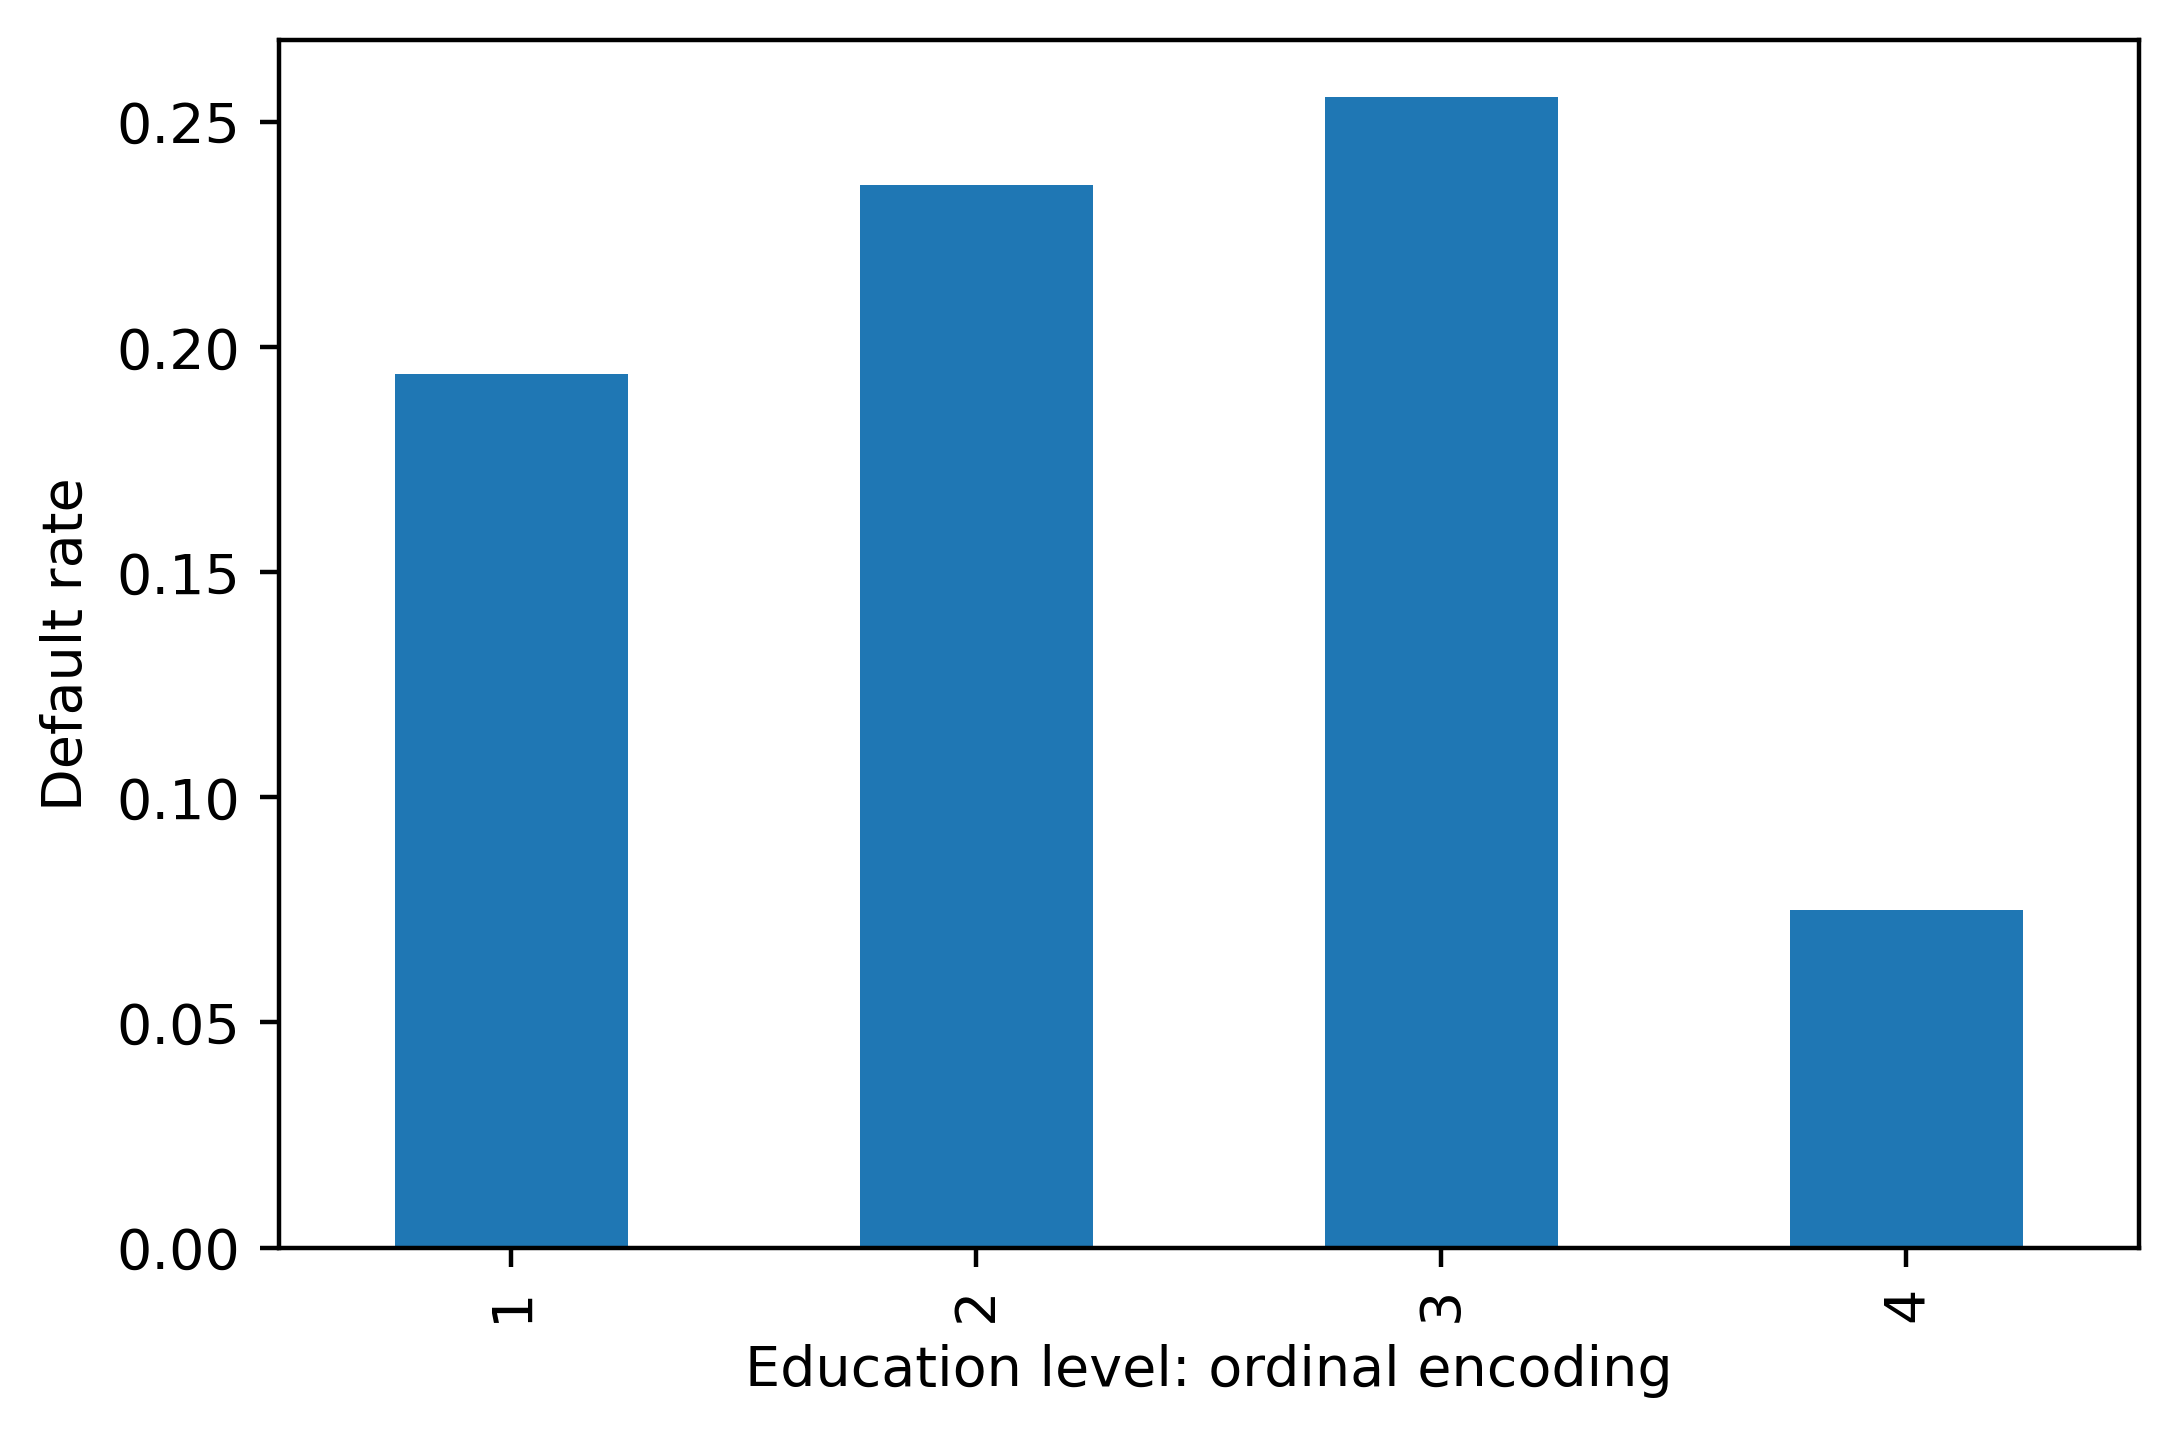

In [44]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

<h2 style="color:green;">Implementing OHE for a Categorical Feature</h2>


In [45]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [46]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [47]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [48]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [49]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [50]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [52]:
df_with_ohe.to_csv('cleaned_data.csv', index=False)

In [53]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [54]:
df[pay_feats].describe()

,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.132867,-0.164333,-0.219300,-0.263900,-0.288033
std,1.191215,1.191096,1.162348,1.127519,1.144981
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000


In [56]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F4A4710>,
      dtype=object)

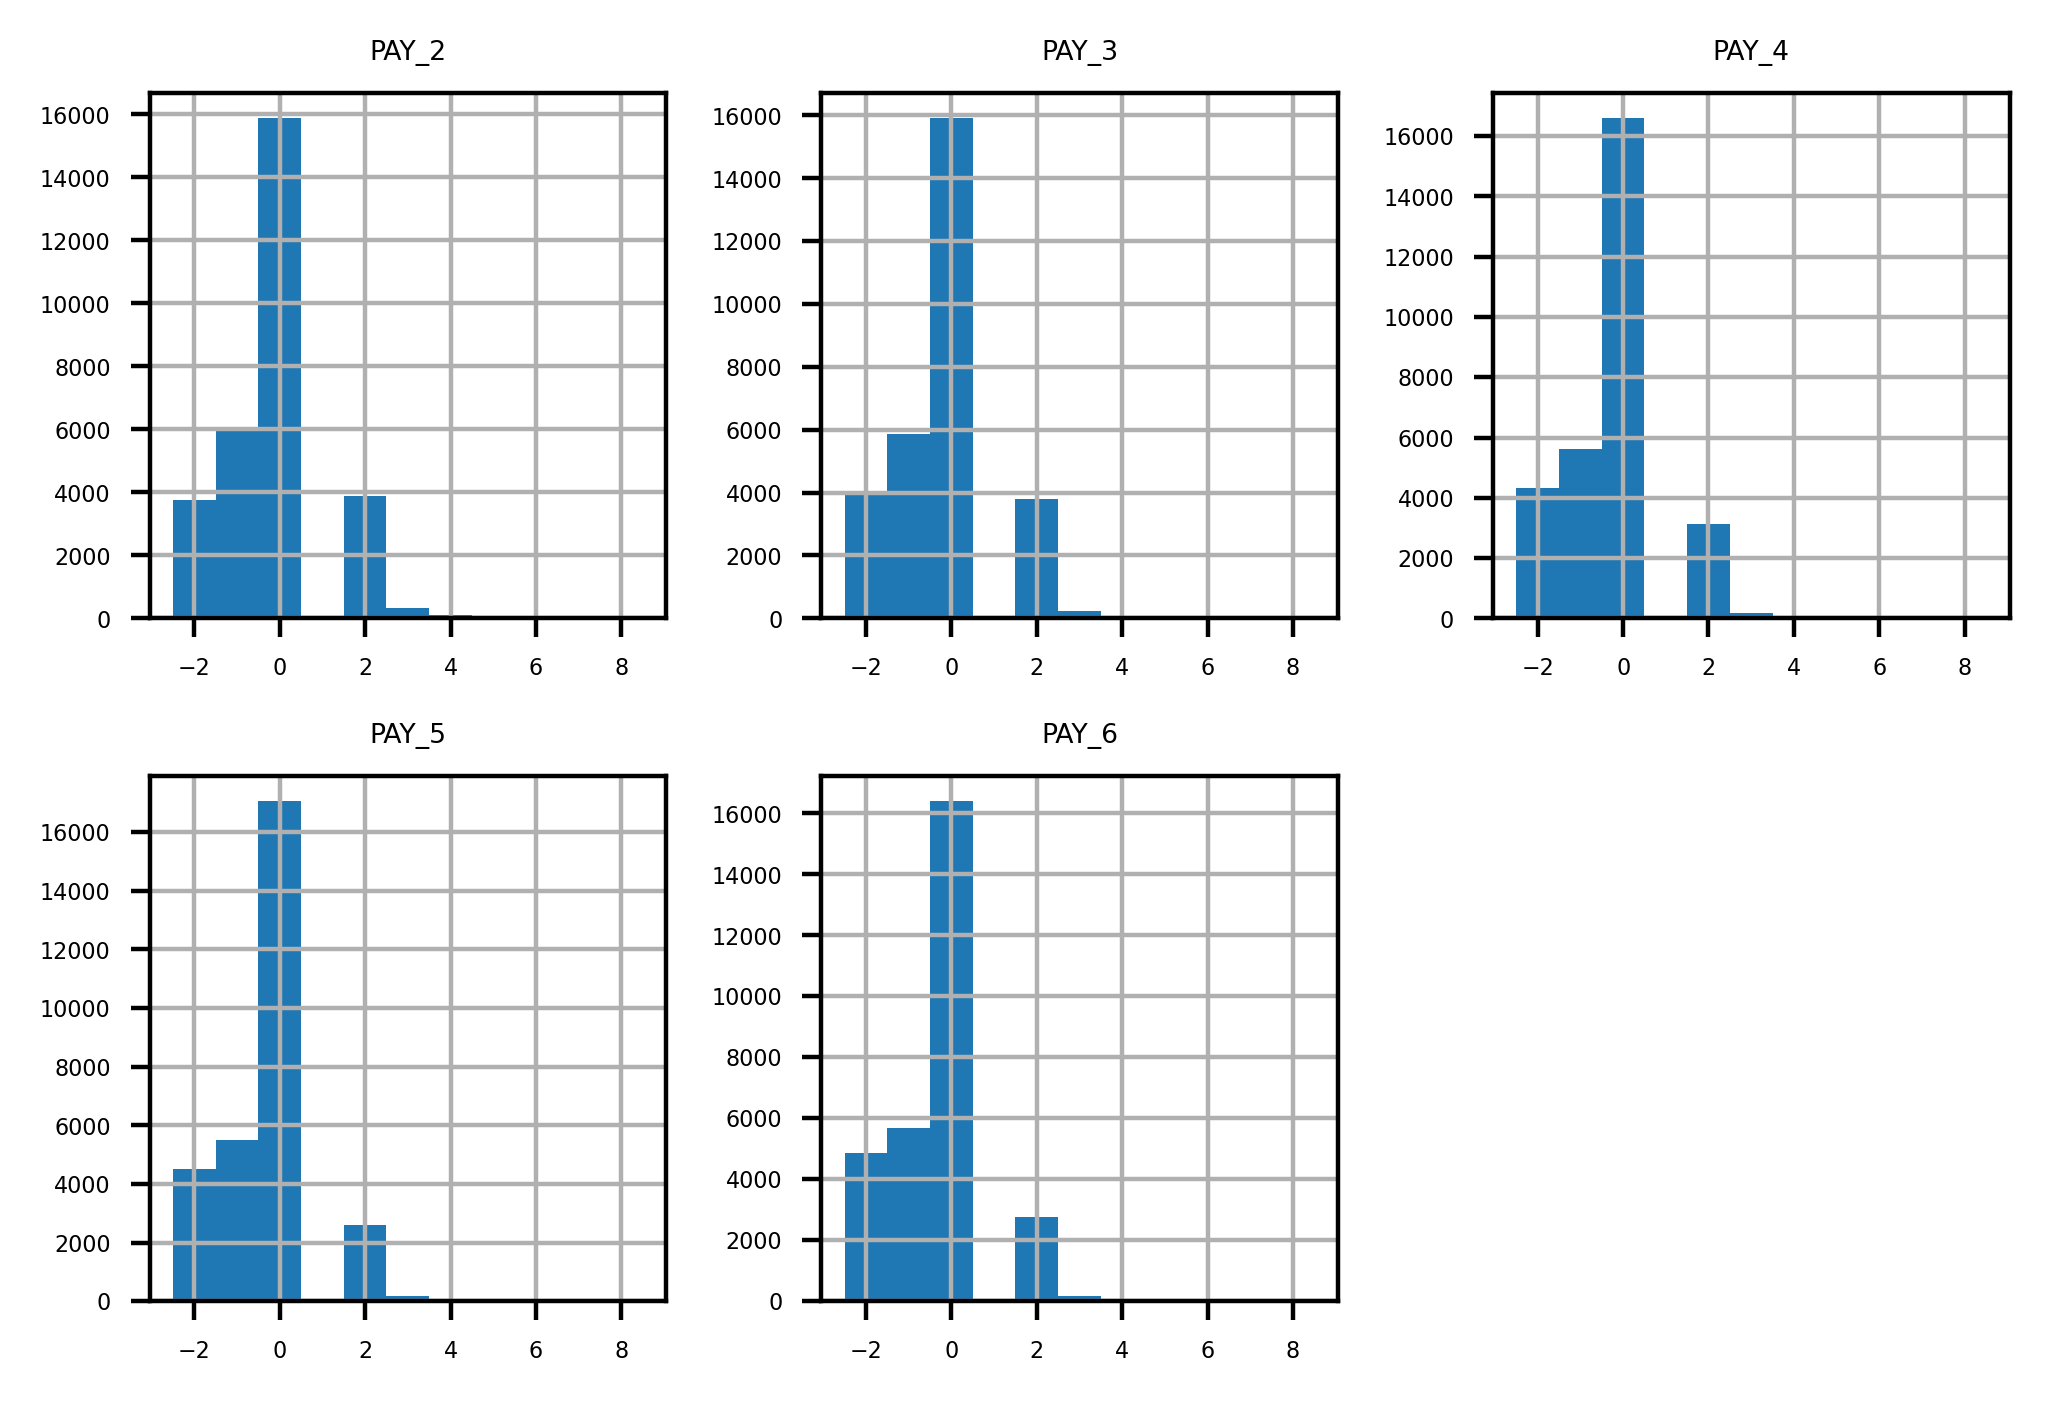

In [58]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [59]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,2


In [60]:
bill_feats = df[["BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"]]
bill_amt_feats = df[["PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]]

In [61]:
bill_feats

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...
29995,188948,192815,208365,88004,31237,15980
29996,1683,1828,3502,8979,5190,0
29997,3565,3356,2758,20878,20582,19357
29998,-1645,78379,76304,52774,11855,48944


In [62]:
bill_amt_feats

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,689,0,0,0,0
1,0,1000,1000,1000,0,2000
2,1518,1500,1000,1000,1000,5000
3,2000,2019,1200,1100,1069,1000
4,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...
29995,8500,20000,5003,3047,5000,1000
29996,1837,3526,8998,129,0,0
29997,0,0,22000,4200,2000,3100
29998,85900,3409,1178,1926,52964,1804


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EB87EF0>,
      dtype=object)

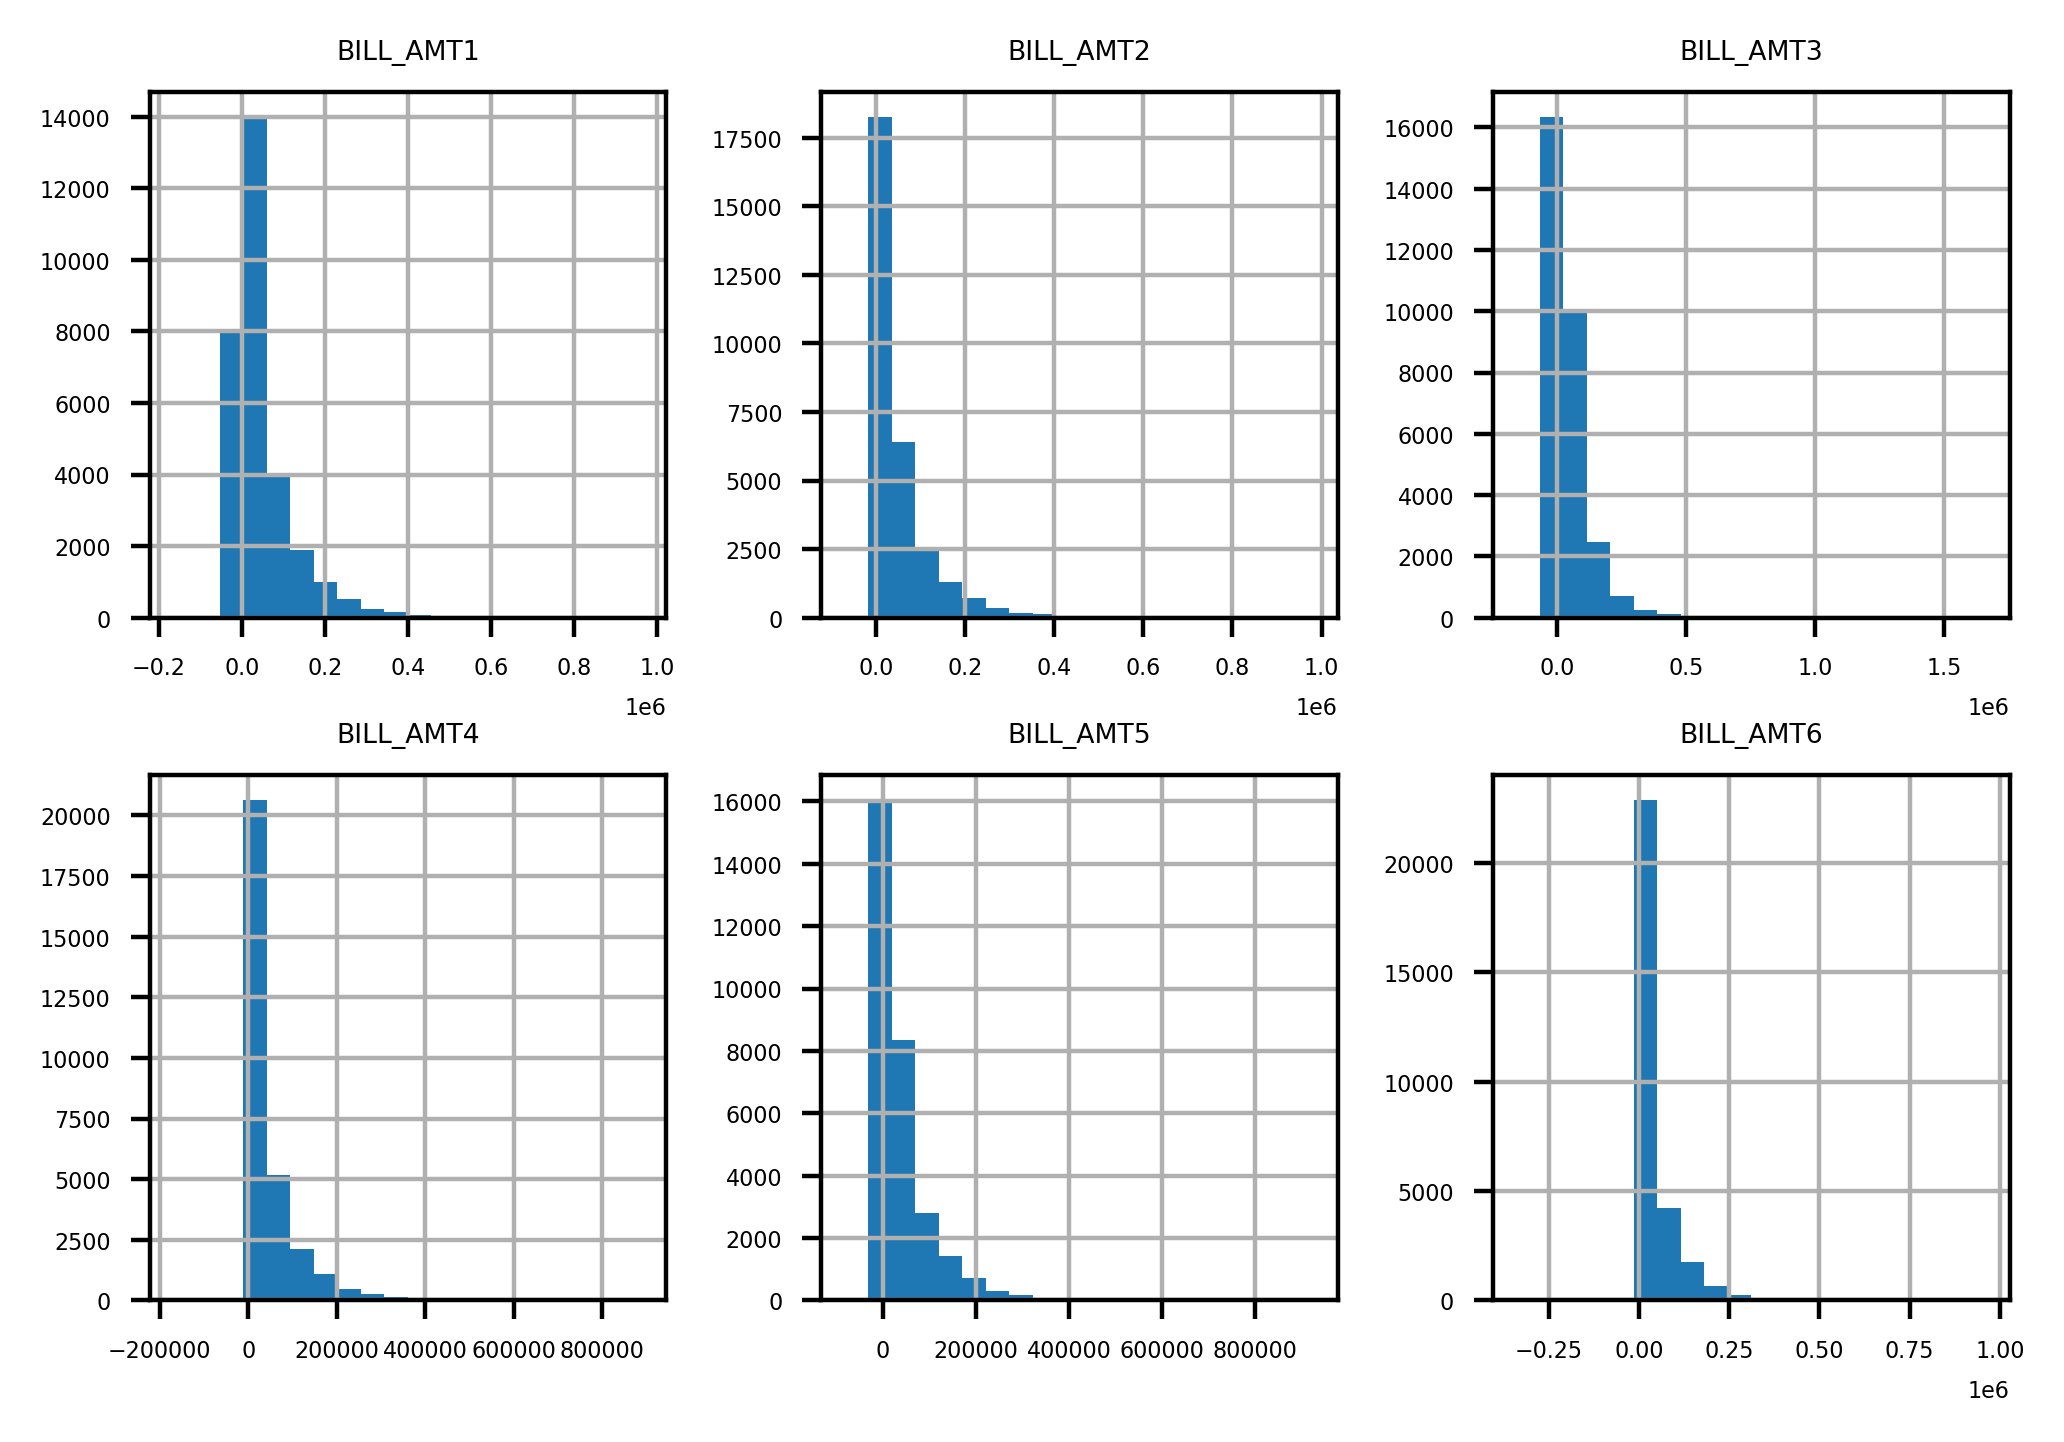

In [63]:
bill_feats.hist(bins=20,layout=(2,3))

In [64]:
bill_amt_feats.describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,5613.321500,5.855410e+03,5174.387967,4776.089733,4754.749200,5164.223267
std,16539.094312,2.299256e+04,17565.538305,15532.893047,15239.070708,17712.664703
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,836.000000,7.217500e+02,371.000000,223.000000,170.750000,9.000000
50%,2084.500000,2.000000e+03,1776.000000,1500.000000,1500.000000,1500.000000
75%,5000.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010D5EA58>,
      dtype=object)

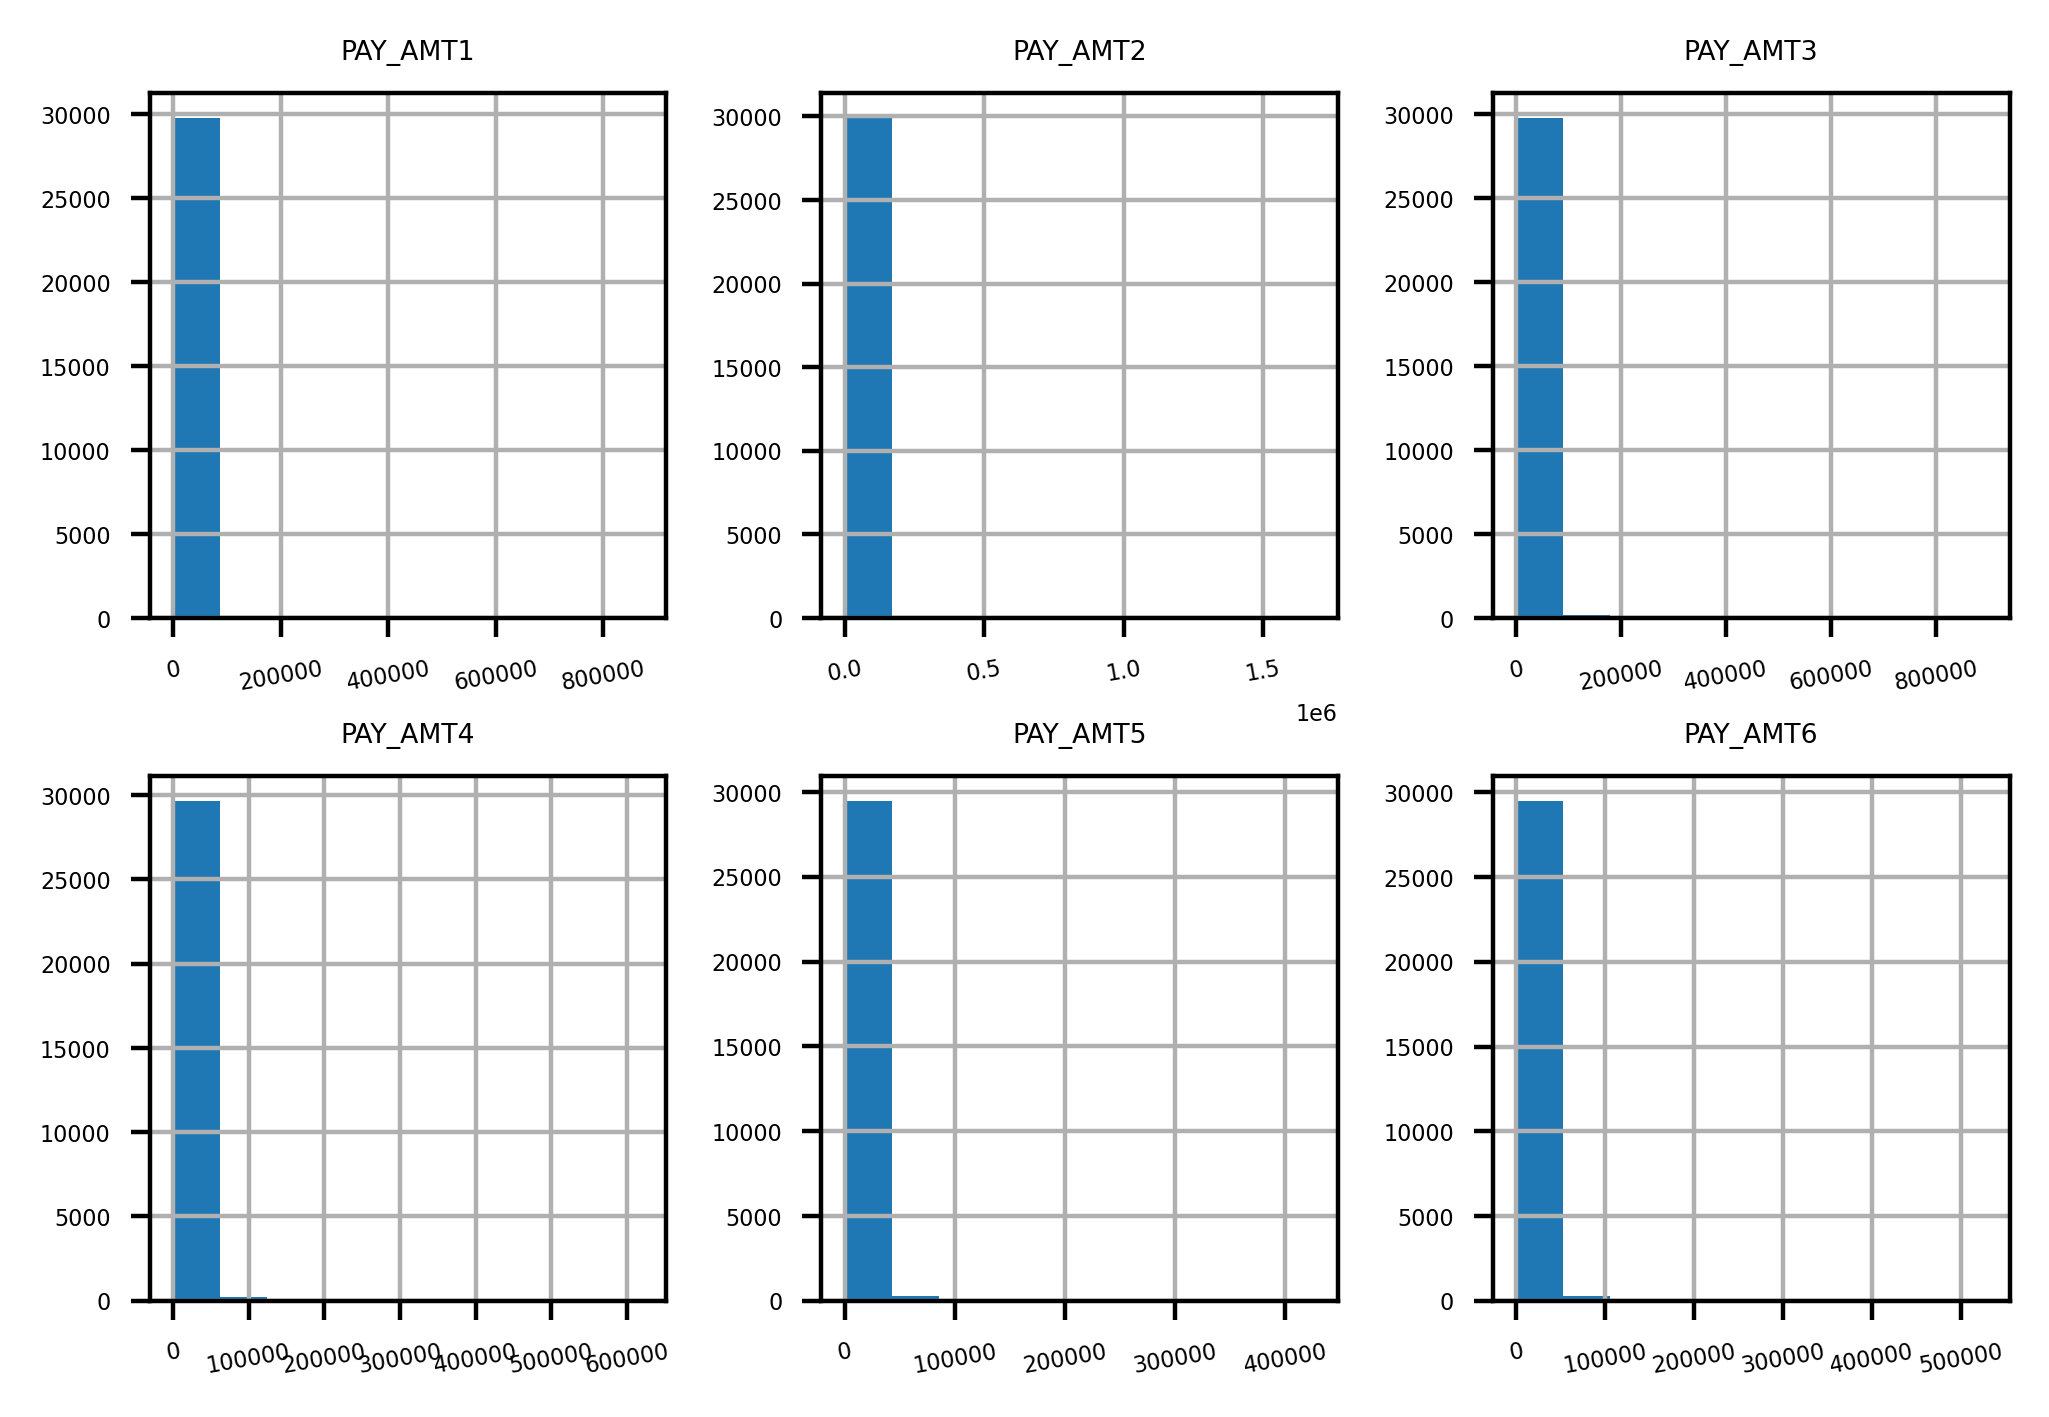

In [65]:
bill_amt_feats.hist(xrot=10,layout=(2,3))

In [66]:
billamt_zero_mask = bill_amt_feats == 0
zero_mask = billamt_zero_mask.iloc[:,1:].all(axis=1)

In [67]:
sum(zero_mask)

2160

In [68]:
x = bill_amt_feats.apply(lambda x: np.log10(x+1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011078D68>,
      dtype=object)

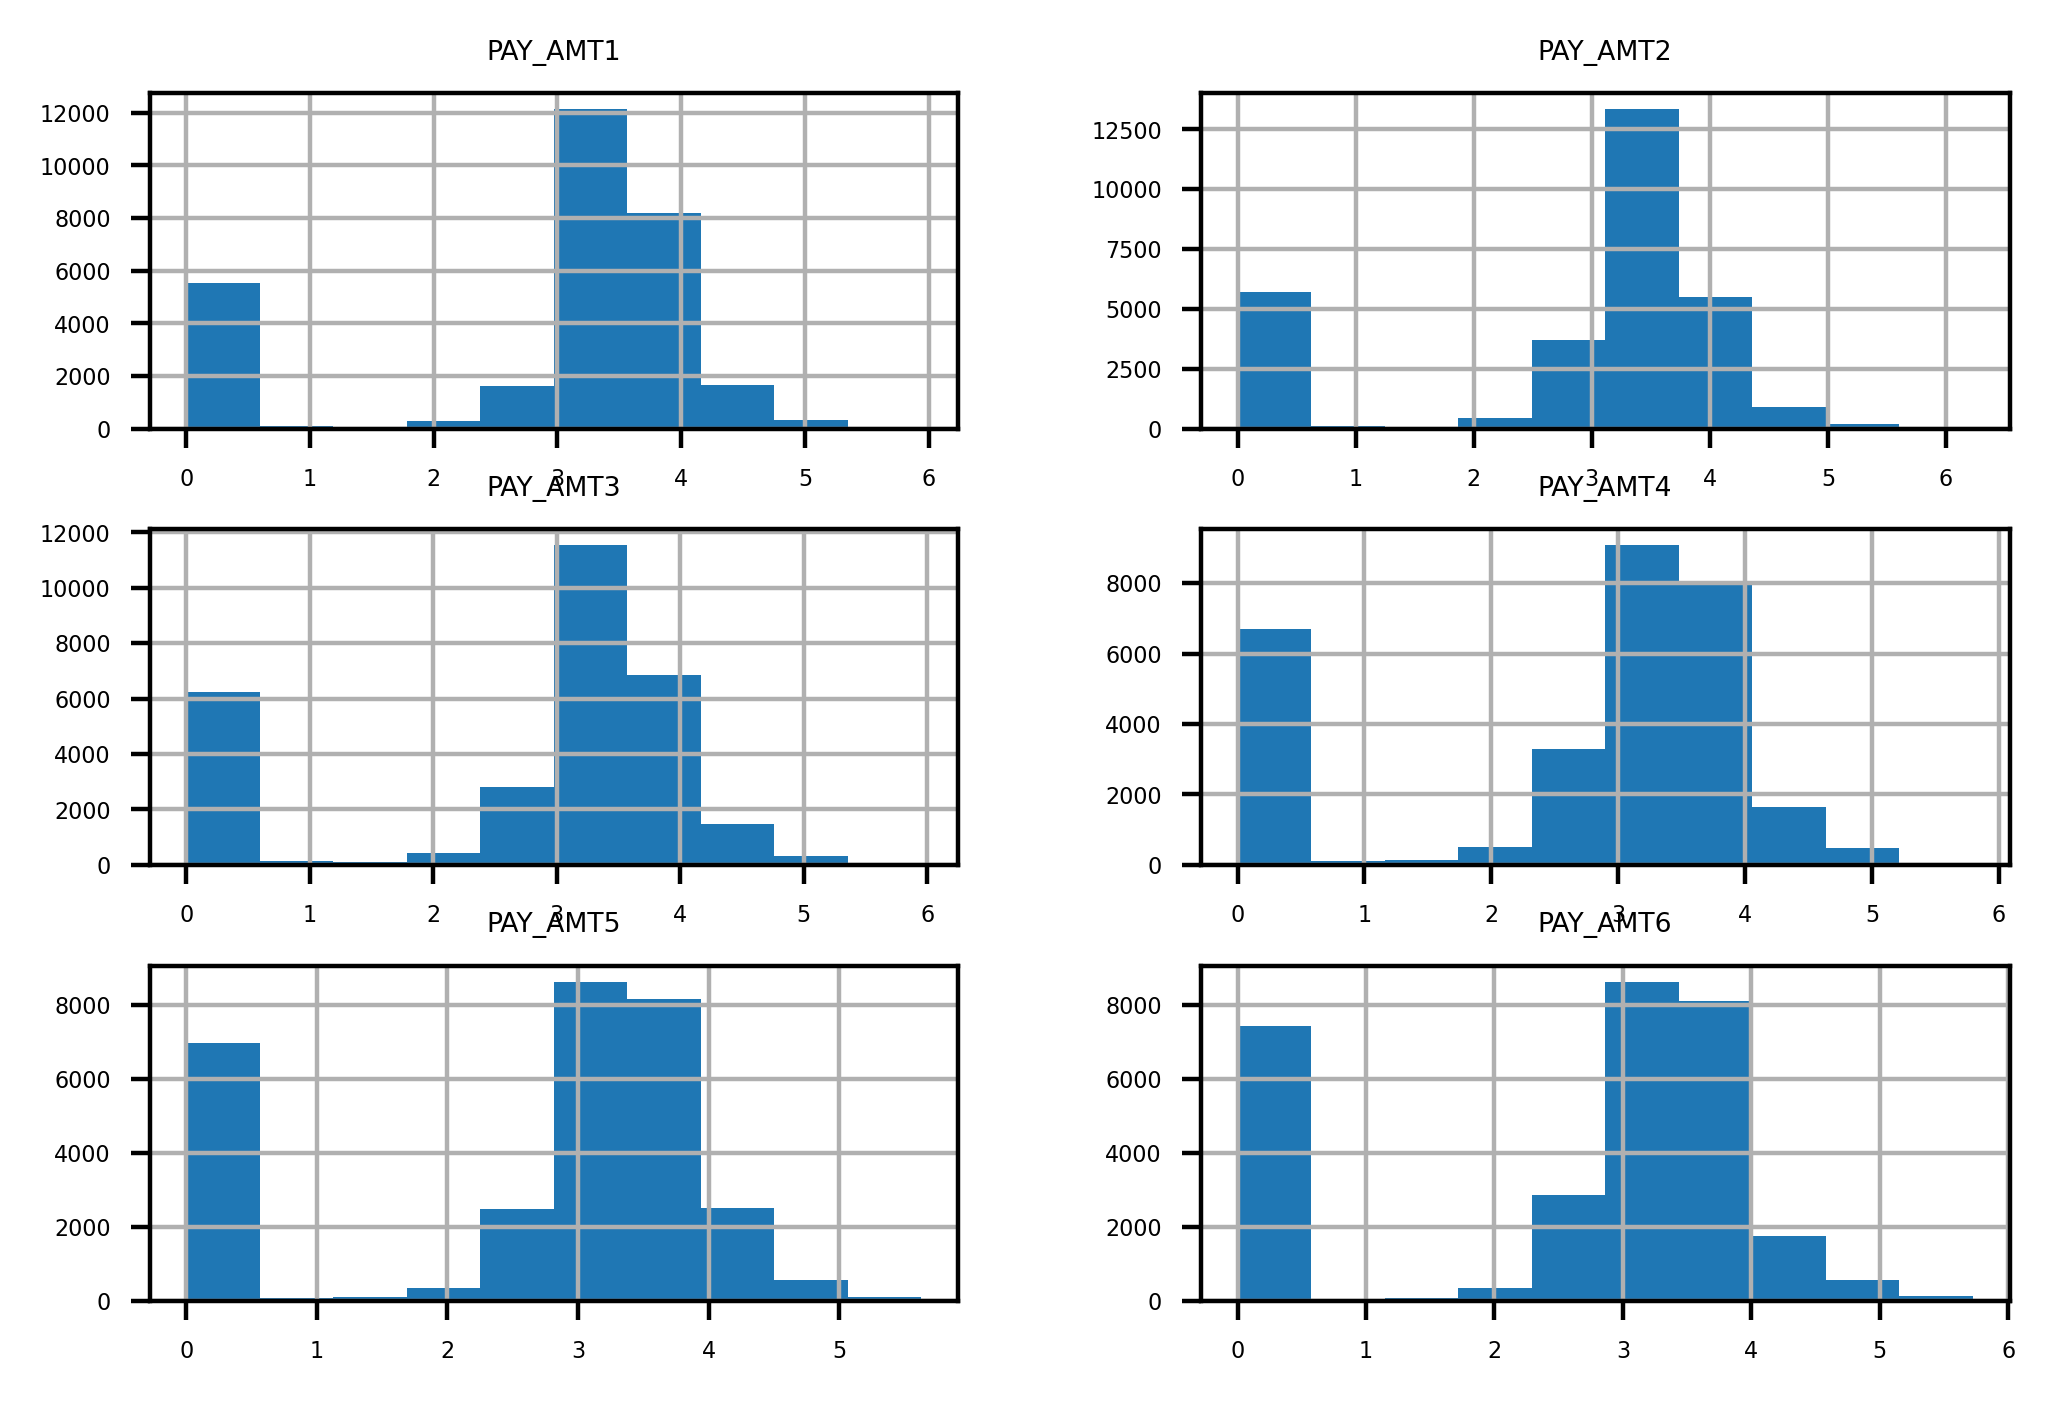

In [69]:
x.hist()